# Importing Librairies

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier ,export_graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
import graphviz
from sklearn.neighbors import KNeighborsClassifier

# Importing DataSet

In [2]:
data = pd.read_csv('dataset.csv')
data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [3]:
#removing columns that have any Nan Values Because we are going to use one_hot encoder 
for i in data:
    if (data[i].isnull().sum() > 1300) :
         data.drop(columns = i,inplace = True)
data.dropna(axis=0,inplace =True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3714 entries, 20 to 4919
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Disease    3714 non-null   object
 1   Symptom_1  3714 non-null   object
 2   Symptom_2  3714 non-null   object
 3   Symptom_3  3714 non-null   object
 4   Symptom_4  3714 non-null   object
 5   Symptom_5  3714 non-null   object
dtypes: object(6)
memory usage: 203.1+ KB


In [4]:
#Using One_hot Encoder to make data symptoms usable for vis
new_data = data.copy()
for i in new_data:
    if "Symptom" in i:
        one_hot = pd.get_dummies(new_data[i], prefix = i)      
        new_data = new_data.drop(columns=i)
        new_data = new_data.join(one_hot)
new_data

,Disease,Symptom_1_ acidity,Symptom_1_ back_pain,Symptom_1_ chills,Symptom_1_ constipation,Symptom_1_ continuous_sneezing,Symptom_1_ cough,Symptom_1_ cramps,Symptom_1_ fatigue,Symptom_1_ headache,...,Symptom_5_ spotting_ urination,Symptom_5_ stiff_neck,Symptom_5_ sweating,Symptom_5_ swelling_joints,Symptom_5_ swollen_blood_vessels,Symptom_5_ swollen_legs,Symptom_5_ unsteadiness,Symptom_5_ yellow_crust_ooze,Symptom_5_ yellowing_of_eyes,Symptom_5_ yellowish_skin
20,GERD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,GERD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,GERD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,GERD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,GERD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4913,Osteoarthristis,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4914,Arthritis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Grouping rows by diseases and making them numeric
encoder = LabelEncoder()
grouped_df = new_data.groupby('Disease').sum().reset_index()         #grouping data by diseases to get the total times the symptom appears in a disease
P_data = grouped_df.sort_values('Disease', ascending=True)
P_data['Disease'] = encoder.fit_transform(P_data['Disease'])
P_data

,Disease,Symptom_1_ acidity,Symptom_1_ back_pain,Symptom_1_ chills,Symptom_1_ constipation,Symptom_1_ continuous_sneezing,Symptom_1_ cough,Symptom_1_ cramps,Symptom_1_ fatigue,Symptom_1_ headache,...,Symptom_5_ spotting_ urination,Symptom_5_ stiff_neck,Symptom_5_ sweating,Symptom_5_ swelling_joints,Symptom_5_ swollen_blood_vessels,Symptom_5_ swollen_legs,Symptom_5_ unsteadiness,Symptom_5_ yellow_crust_ooze,Symptom_5_ yellowing_of_eyes,Symptom_5_ yellowish_skin
0,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,36,0,0,0
1,Alcoholic hepatitis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arthritis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bronchial Asthma,0,0,0,0,0,12,0,108,0,...,0,0,0,0,0,0,0,0,0,0
4,Cervical spondylosis,0,78,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Chicken pox,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Chronic cholestasis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Common Cold,0,0,6,0,114,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Dengue,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Diabetes,0,0,0,0,0,0,0,114,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Making a New_data set which works with One label encoder to avoid over ftitting 
encoder = LabelEncoder()
for i in data :
    if (data[i].dtype == "object"):                                #if data[i] is object transform it into numeric
        data[i] = encoder.fit_transform(data[i])
data 

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
20,12,15,1,31,33,4
21,12,15,25,32,5,3
22,12,15,1,32,5,3
23,12,15,1,31,5,3
24,12,15,1,31,33,3
...,...,...,...,...,...,...
4913,25,10,19,15,14,31
4914,2,12,24,29,20,25
4915,0,16,10,19,28,22
4918,28,14,13,25,26,27


# Data Vis

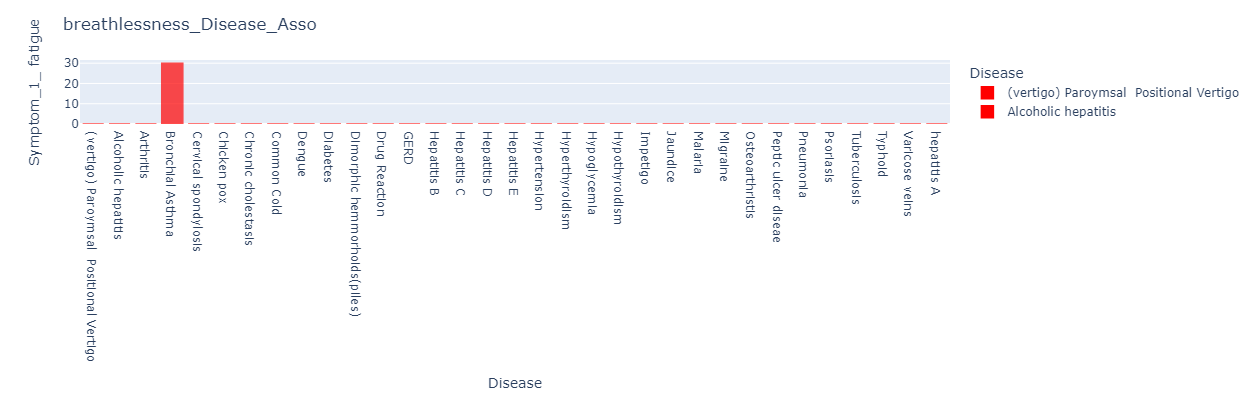

In [21]:
#Bar chart
fig = px.bar(P_data, x="Disease", y="Symptom_3_ breathlessness", color="Disease", height=400)
fig.update_layout(title_text="breathlessness_Disease_Asso", xaxis_title="Disease", yaxis_title="Symptom_1_ fatigue")
fig.update_traces(marker=dict(color='red', opacity=0.7, line=dict(color='red', width=1.5)))
fig.update_layout(coloraxis_colorbar=dict(title="Cough_Disease_Asso"))
fig.show()

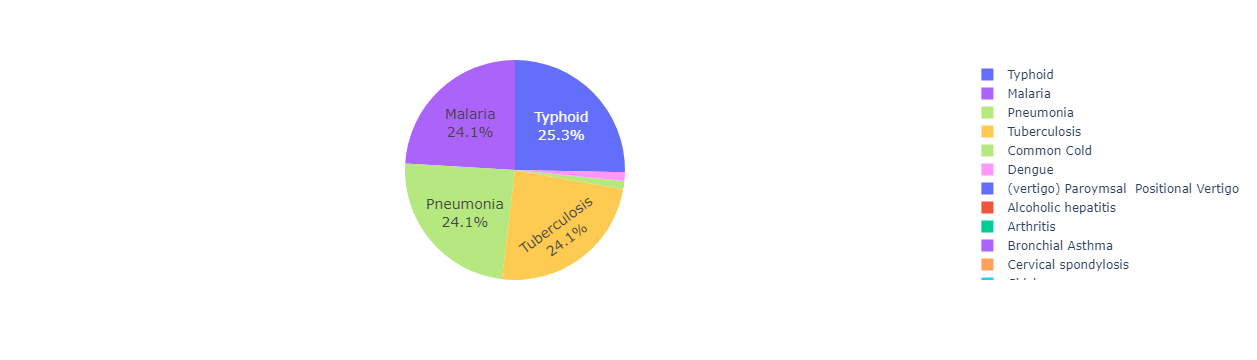

In [27]:
#Pie chart
fig = px.pie(P_data, values='Symptom_1_ chills', names='Disease', 
             color='Disease', title='')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide')
fig.show()

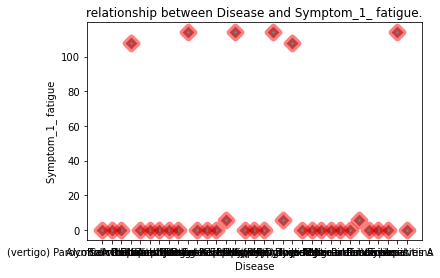

In [30]:
#Scatter plot
plt.scatter(P_data['Disease'], P_data['Symptom_1_ fatigue'], c ="black",linewidths = 6, marker ="D", edgecolor ='r', s = 70, alpha=0.5)
plt.title('relationship between Disease and Symptom_1_ fatigue.')
plt.xlabel('Disease')
plt.ylabel('Symptom_1_ fatigue')

plt.show()

# Machine Learning

In [10]:
x=data[['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5']]
y=data['Disease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  #splitting data

# Logistic Reg

In [19]:
logreg = LogisticRegression(solver='liblinear', penalty='l1', max_iter=4000)   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.85


# Decision Tree

In [7]:
chojra = tree.DecisionTreeClassifier()  
chojra.fit(x_train, y_train)   #fitting our model
y_pred=chojra.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:1.0


# KNN

In [33]:
knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9152086137281292


# Random Forest

In [11]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 1.0
